In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EMA Electricity Forecast/Electricity-Generated (annual).xls")

In [ ]:
df1.head()

,Year,Electricity Generated (Gwh),Total Population,Air Temperature Daily Maximum,GDP In Chained (2015) Dollars,24 Hours Mean Relative Humidity (Per Cent),HDB Residential units,Industrial Contracts Awarded,Median Household Income,Manufacturing Output,EV Sales,EV charging stations
0,1975,4175.7,2262600,30.4,31026.6,86.9,NaN,NaN,NaN,NaN,NaN,NaN
1,1976,4604.9,2293300,30.7,33334.1,85.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1977,5114.7,2325300,30.9,35618.3,85.6,NaN,NaN,NaN,NaN,NaN,NaN
3,1978,5897.9,2353600,31.0,38388.4,86.1,NaN,NaN,NaN,NaN,NaN,NaN
4,1979,6447.8,2383500,31.0,42056.2,85.8,NaN,NaN,NaN,NaN,NaN,NaN


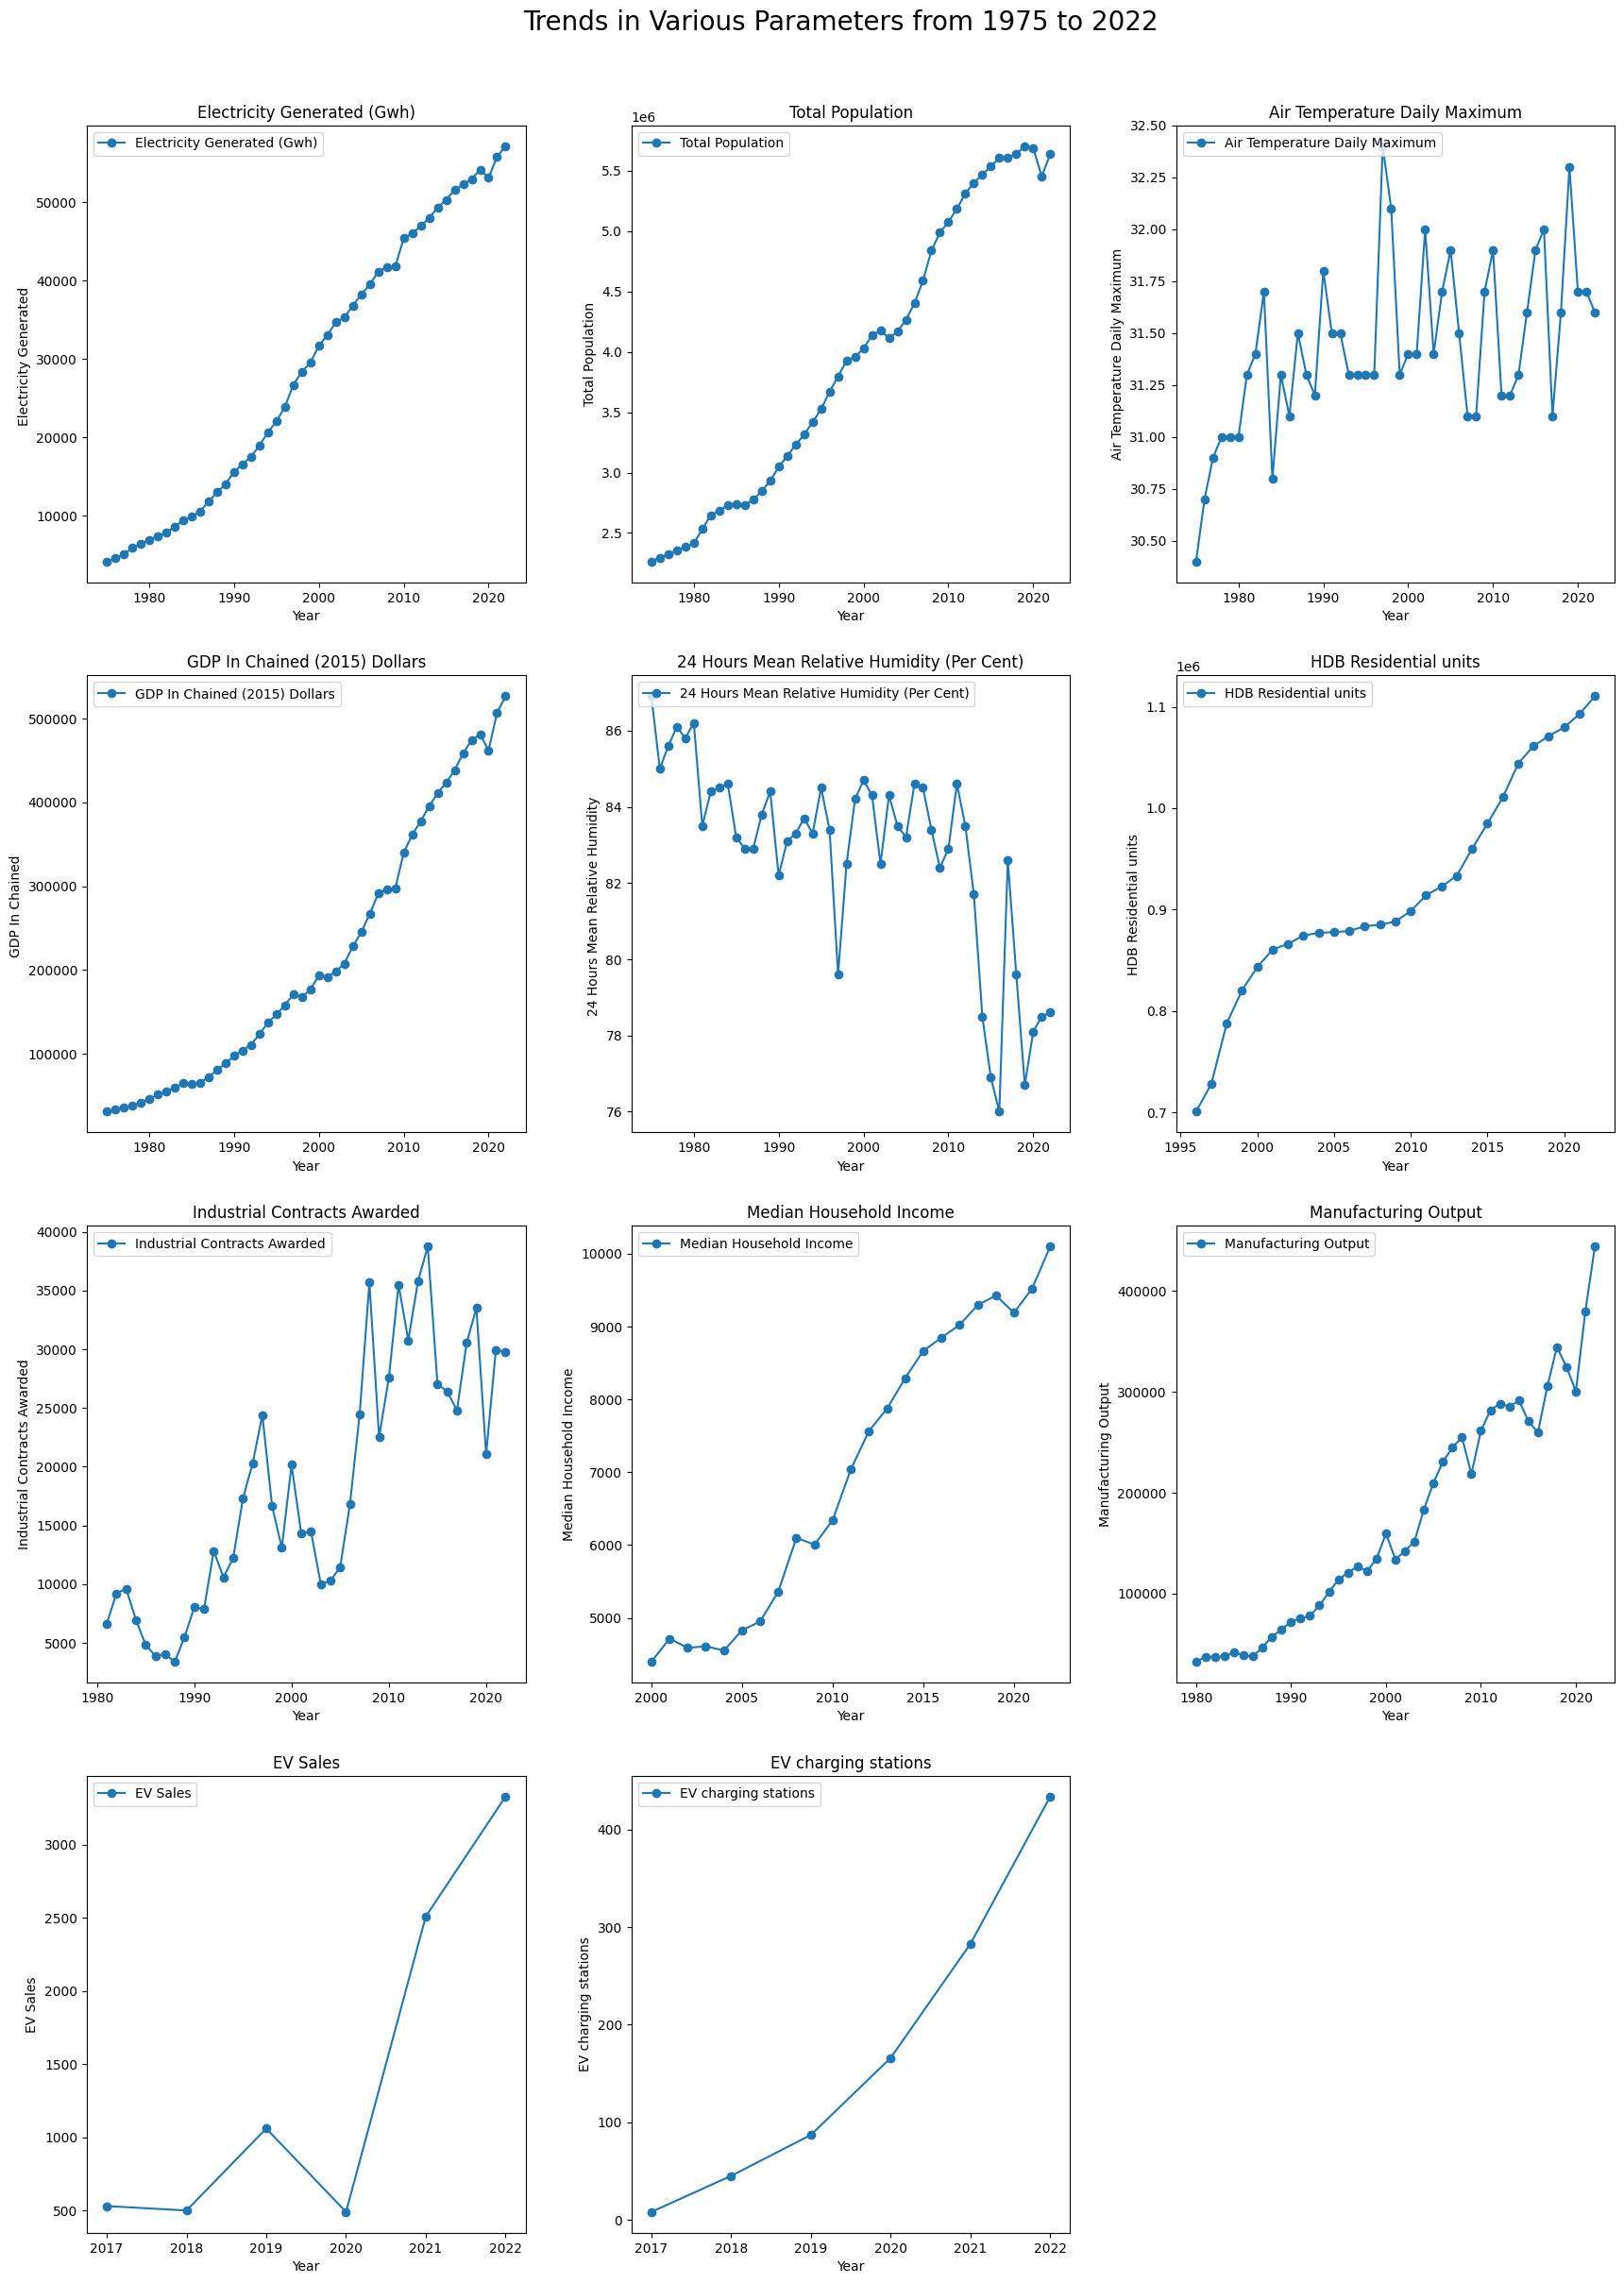

In [ ]:
# Setting up the figure for a 4x3 subplot layout
fig, axs = plt.subplots(4, 3, figsize=(18, 24))

# Adjusting layout for better spacing
fig.tight_layout(pad=5.0)
fig.suptitle('Trends in Various Parameters from 1975 to 2022', fontsize=20, y=1.02)

# Loop through the list of columns and plot each in its subplot
for i, col in enumerate(columns):
    ax = axs[i//3, i%3]  # Determining the position of the current subplot
    ax.plot(df1['Year'], df1[col], label=col, marker='o', linestyle='-')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col.split('(')[0])  # Splitting to remove units for simplicity
    ax.legend(loc='upper left')

# Hide any unused subplots (since we have 11 parameters and 12 subplot slots)
for i in range(len(columns), 12):
    fig.delaxes(axs.flatten()[i])

plt.show()

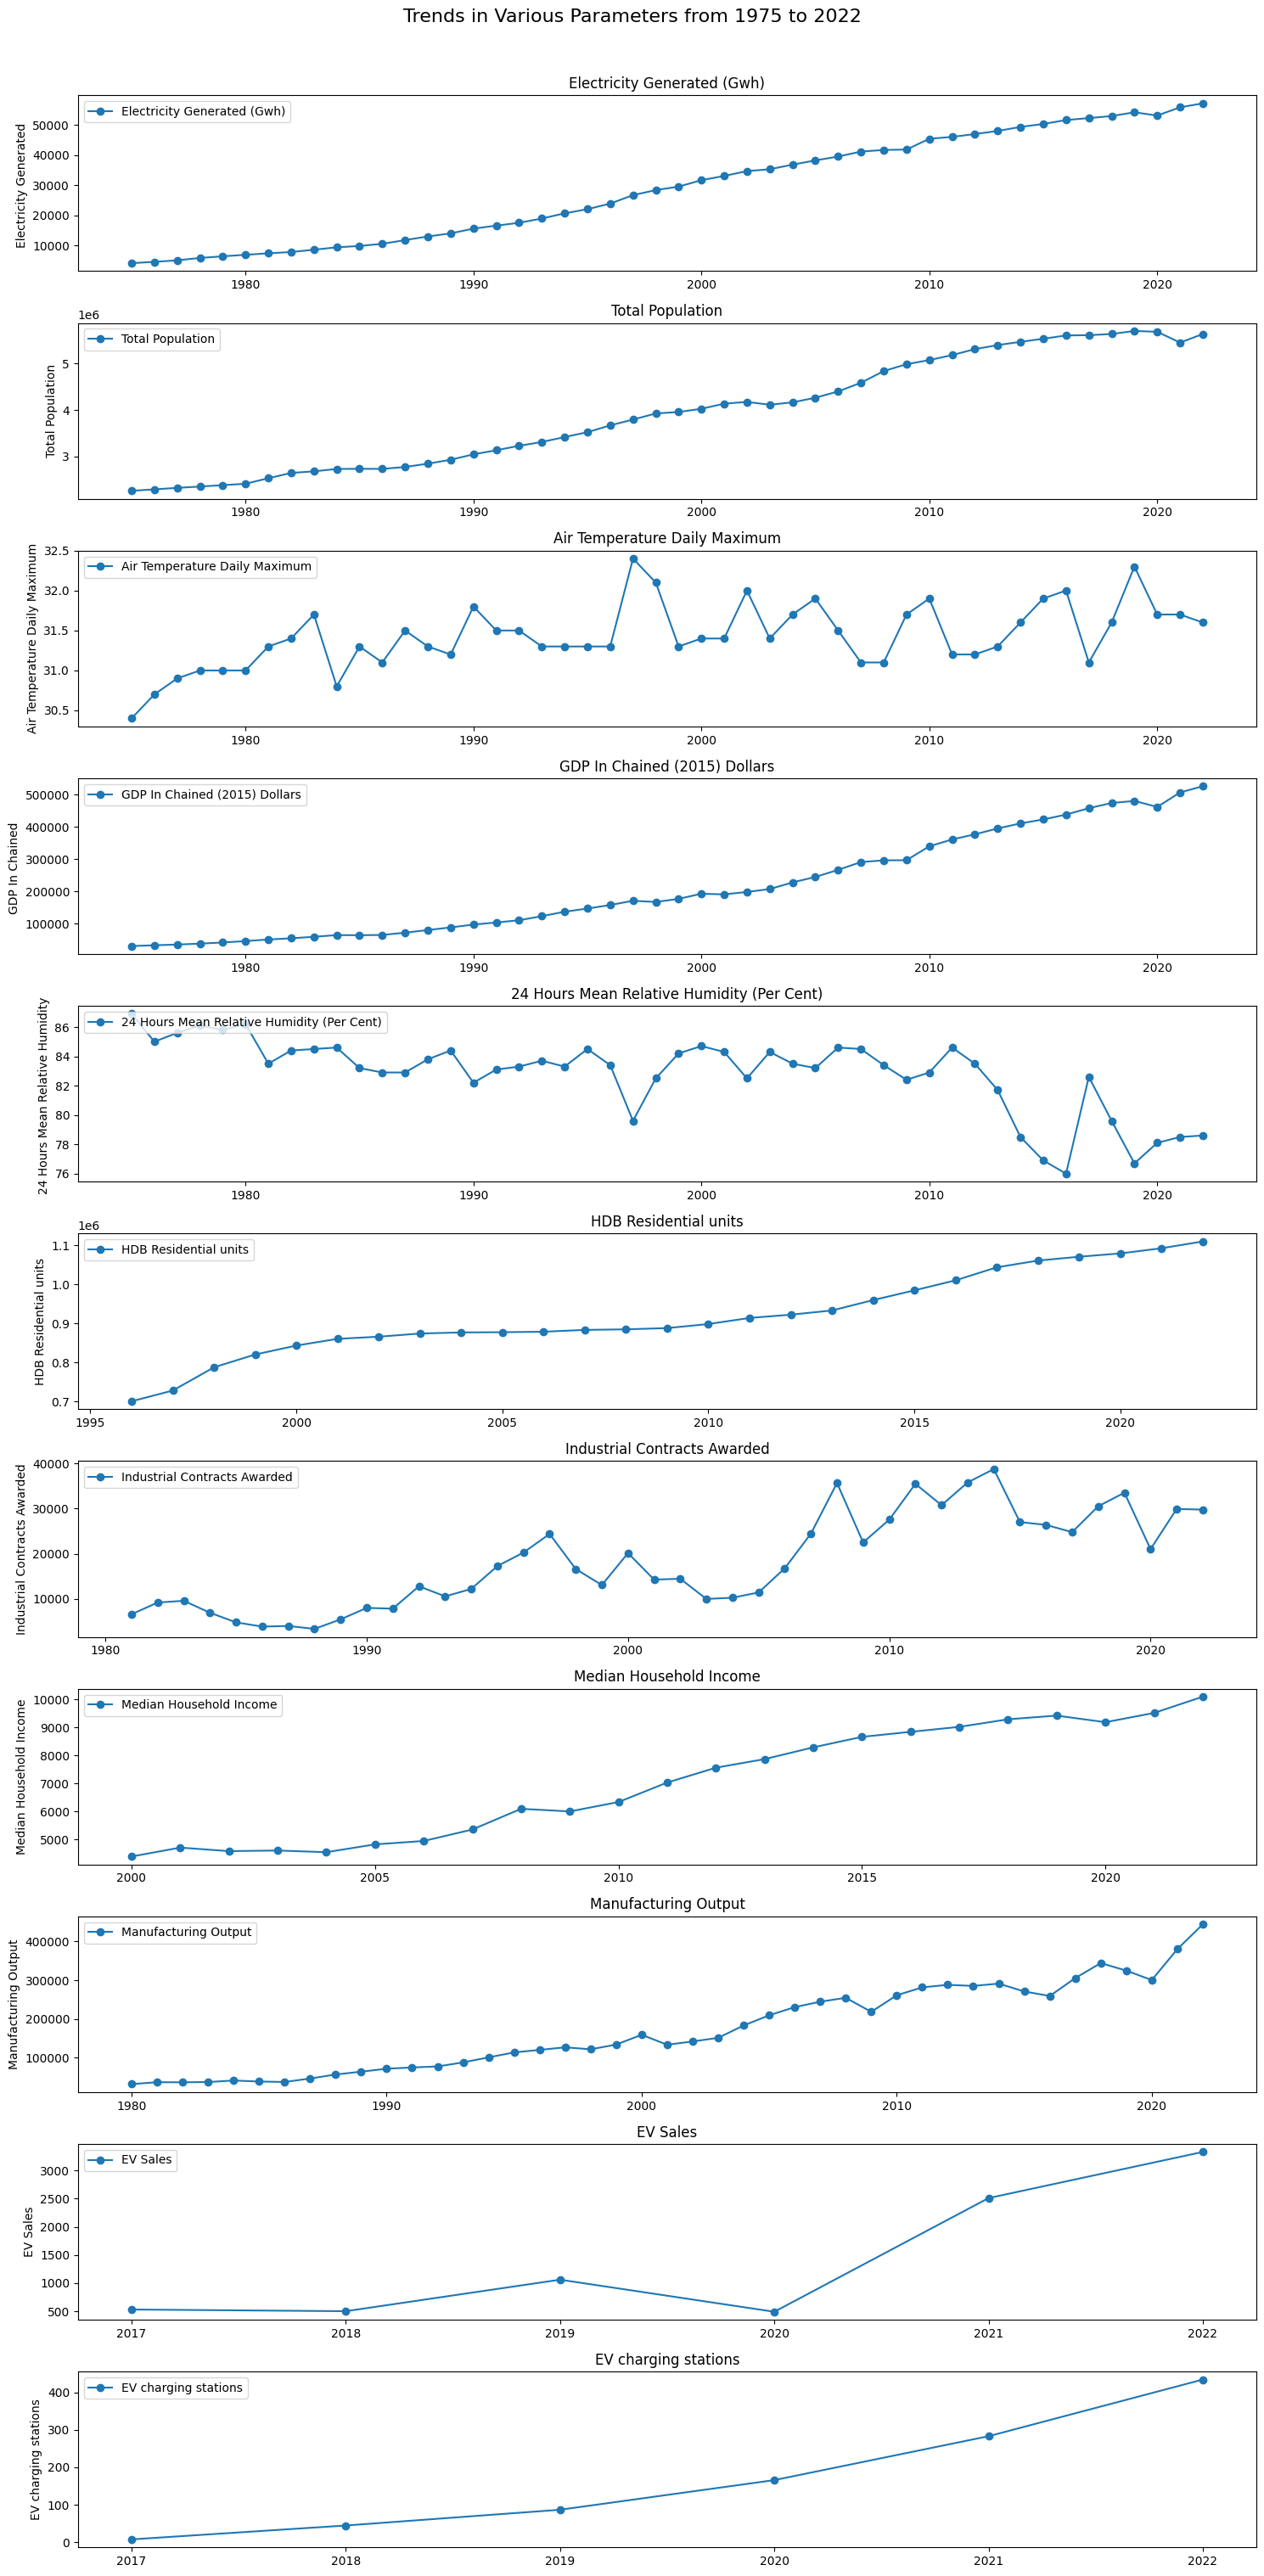

In [ ]:
# Setting up the figure for multiple line charts
fig, axs = plt.subplots(11, 1, figsize=(15, 30))

# Title for the whole figure
fig.suptitle('Trends in Various Parameters from 1975 to 2022', fontsize=16, y=1.01)

# List of columns to plot
columns = df1.columns[1:]  # Excluding the 'Year' column

for i, col in enumerate(columns):
    axs[i].plot(df1['Year'], df1[col], label=col, marker='o', linestyle='-')
    axs[i].set_title(col)
    axs[i].set_ylabel(col.split('(')[0])  # Splitting to remove units for simplicity
    axs[i].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## Correlation Plot

In [ ]:
# Calculating correlation matrix to understand the relationship between electricity generation and other factors
correlation_matrix = df1.corr()

# Focusing on the correlation of other factors with electricity generation
electricity_correlation = correlation_matrix['Electricity Generated (Gwh)'].sort_values(ascending=False)

electricity_correlation


Electricity Generated (Gwh)                   1.000000
Total Population                              0.994068
Year                                          0.993727
Median Household Income                       0.980283
EV Sales                                      0.979760
GDP In Chained (2015) Dollars                 0.976720
Manufacturing Output                          0.971254
HDB Residential units                         0.954957
EV charging stations                          0.940279
Industrial Contracts Awarded                  0.850425
Air Temperature Daily Maximum                 0.506581
24 Hours Mean Relative Humidity (Per Cent)   -0.693600
Name: Electricity Generated (Gwh), dtype: float64

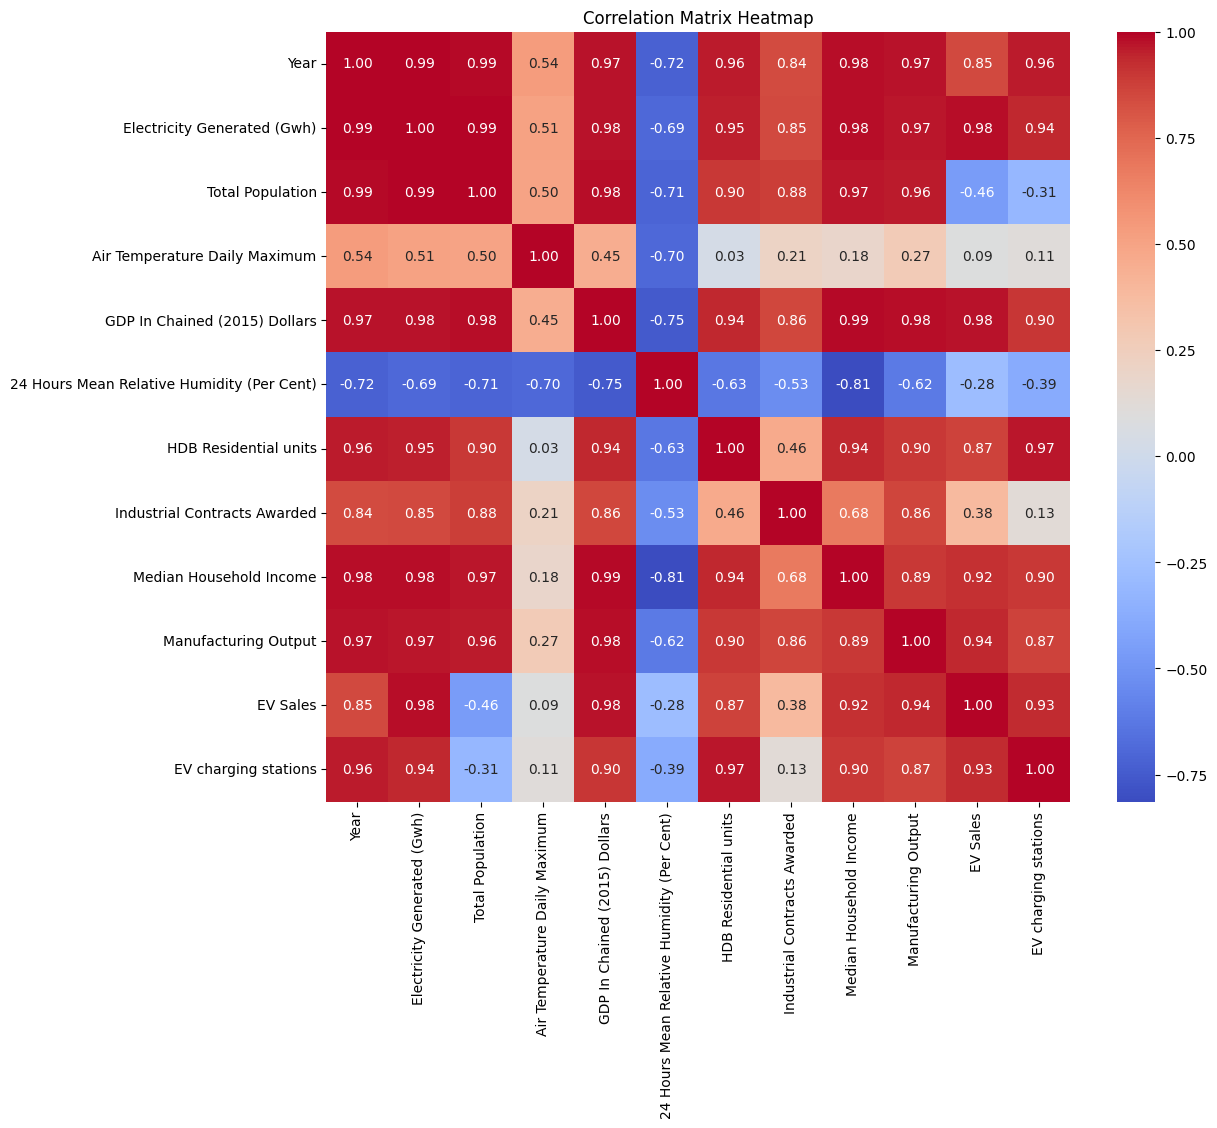

In [ ]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()